In [4]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import time

In [7]:
file = uproot.open(path="/lustre/cms/store/user/adiflori/jpsikk_DataRunII_UltraLegacy_miniAODv2_v1_m4To6/Charmonium/crab_Charmonium_Run2018D-UL2018_MiniAODv2-v1_MINIAOD__1SKK_20220512_114449/220512_094551/0000/rootuple.root")
print(file.classnames())
os.path.getsize("/lustre/cms/store/user/adiflori/jpsikk_DataRunII_UltraLegacy_miniAODv2_v1_m4To6/Charmonium/crab_Charmonium_Run2018D-UL2018_MiniAODv2-v1_MINIAOD__1SKK_20220512_114449/220512_094551/0000/rootuple.root") / 2**30

{'rootuple;1': 'TDirectory', 'rootuple/CandidateTree;1': 'TTree', 'rootuple/UpsTree;1': 'TTree'}


1.4288340201601386

In [12]:
start_time = time.time()
data = file["rootuple"]["CandidateTree"].arrays(
    ["candidate_charge", "candidate_cosAlpha", "candidate_lxy", "candidate_lxyErr", "candidate_vProb", "ditrack_mass", "candidate_vMass"], 
    library="np",
)
time.time() - start_time

1.6332695484161377

In [18]:
candidate_data

{'candidate_charge': array([ 0,  2, -2, ..., -2,  2,  0], dtype=int32),
 'candidate_cosAlpha': array([ 0.99958491,  0.99920046, -0.45697042, ..., -0.27336007,
         0.98827177,  0.99999809]),
 'candidate_lxy': array([0.14828931, 0.12896161, 0.00205554, ..., 0.01309498, 0.01197009,
        0.08299624]),
 'candidate_lxyErr': array([0.01104137, 0.01085308, 0.00403024, ..., 0.00317806, 0.00643969,
        0.00626239]),
 'candidate_vProb': array([2.83941418e-01, 3.11477488e-05, 1.39193043e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 'ditrack_mass': array([1.03657763, 1.03341069, 1.01429184, ..., 1.04203303, 1.02181807,
        1.02441725]),
 'candidate_vMass': array([4.19217682, 4.22157955, 4.40745735, ..., 5.80941629, 5.12995481,
        5.29369688])}

In [3]:
#file["rootuple"]["CandidateTree"].arrays(library="pd").to_hdf("raw/data.h5", key="candidate")
#file["rootuple"]["UpsTree"].arrays(library="pd").to_hdf("raw/data.h5", key="ups")

In [4]:
# ups_data = pd.read_hdf("raw/data.h5", key="ups")
# candidate_data = pd.read_hdf("raw/data.h5", key="candidate")

In [9]:
candidate_data = file["rootuple"]["CandidateTree"]['candidate_vMass'].arrays(library="pd")
candidate_data


KeyboardInterrupt



In [6]:
file["rootuple"]["CandidateTree"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
event                | int32_t                  | AsDtype('>i4')
nCandPerEvent        | int32_t                  | AsDtype('>i4')
numPrimaryVertices   | int32_t                  | AsDtype('>i4')
trigger              | int32_t                  | AsDtype('>i4')
candidate_p4         | TLorentzVector           | AsStridedObjects(Model_TLor...
track1_p4            | TLorentzVector           | AsStridedObjects(Model_TLor...
track2_p4            | TLorentzVector           | AsStridedObjects(Model_TLor...
ditrack_p4           | TLorentzVector           | AsStridedObjects(Model_TLor...
dimuon_p4            | TLorentzVector           | AsStridedObjects(Model_TLor...
muonp_p4             | TLorentzVector           | AsStridedObjects(Model_TLor...
muonn_p4             | TLor

In [7]:
cut = (candidate_data['candidate_charge'] == 0)\
    & (candidate_data['candidate_cosAlpha'] > 0.99)\
    & (candidate_data['candidate_lxy'] / candidate_data['candidate_lxyErr'] > 3.0)\
    & (candidate_data['candidate_vProb'] > 0.05)\
    & (candidate_data['ditrack_mass'] > 1.014) & (candidate_data['ditrack_mass'] < 1.024)\
    & (candidate_data['candidate_vMass'] > 5.33) & (candidate_data['candidate_vMass'] < 5.4)

<AxesSubplot:>

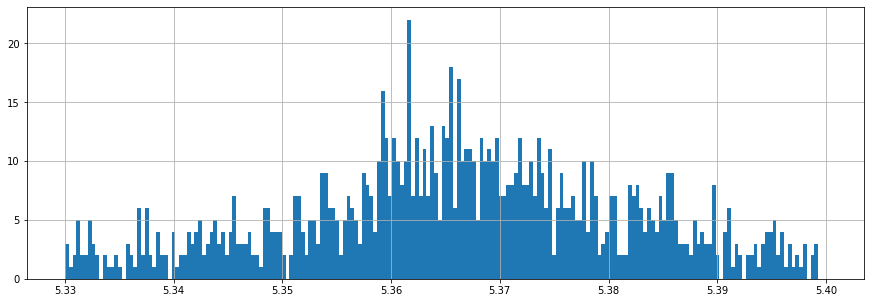

In [8]:
candidate_data[cut]['candidate_vMass'].hist(bins=200, figsize=(15, 5), range=(5.33, 5.4))
#candidate_data[-cut]['candidate_vMass'].hist(bins=200, figsize=(15, 5), histtype="step", range=(5.25, 5.5))

<AxesSubplot:>

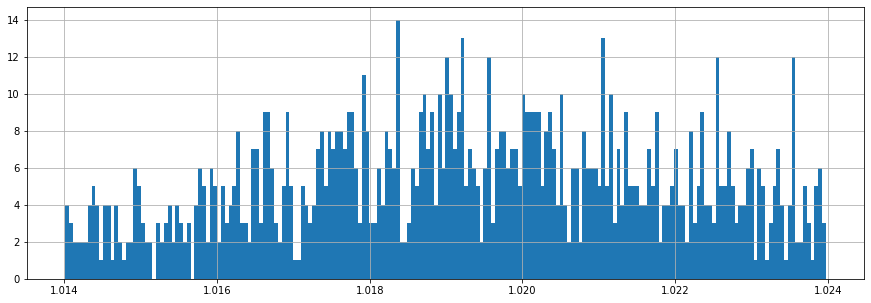

In [10]:
candidate_data[cut]['ditrack_mass'].hist(bins=200, figsize=(15, 5))
#candidate_data[-cut]['ditrack_mass'].hist(bins=200, figsize=(15, 5), histtype="step")

In [14]:
path = "../merged/"

In [15]:
filenames = sorted(os.listdir(path))
files_to_read = []
for i in range(5):
    files_to_read.append(path + filenames[i] + ":rootuple/CandidateTree")


In [31]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import time

path = "../merged/"
filenames = sorted(os.listdir(path))
files_to_read = []
for i in range(5):
    files_to_read.append(path + filenames[i] + ":rootuple/CandidateTree")

start_time = time.time()
array = uproot.concatenate(
    files_to_read, 
    "candidate_vMass",
    "(candidate_charge == 0)\
    & (candidate_cosAlpha > 0.99)\
    & (candidate_lxy / candidate_lxyErr > 3.0)\
    & (candidate_vProb > 0.05)\
    & (ditrack_mass > 1.014) & (ditrack_mass < 1.024)\
    & (candidate_vMass > 5.33) & (candidate_vMass < 5.4)",
    library="np",
    #num_workers=1
)
time.time() - start_time

11.660010576248169

In [2]:
import time
from concurrent.futures import ThreadPoolExecutor
import multiprocessing
import math
import numpy as np
import uproot
import os

In [86]:
# start = time.time()
# file = uproot.open(path=path, object_cache=None, array_cache=None)
# data = file.arrays(
#     "candidate_vMass", 
#     "(candidate_charge == 0)\
#     & (candidate_cosAlpha > 0.99)\
#     & (candidate_lxy / candidate_lxyErr > 3.0)\
#     & (candidate_vProb > 0.05)\
#     & (ditrack_mass > 1.014) & (ditrack_mass < 1.024)\
#     & (candidate_vMass > 5.33) & (candidate_vMass < 5.4)",
#     entry_start=1000,
#     entry_stop=2000,
#     array_cache=None,
#     library="np"
# )["candidate_vMass"]

# time.time() - start

In [51]:
def read_chunk(file, entry_start, entry_stop, result):
    data = uproot.open(path=file, object_cache=None, array_cache=None)
    result.append(data.arrays("candidate_vMass", 
                              "(candidate_charge == 0)\
                              & (candidate_cosAlpha > 0.99)\
                              & (candidate_lxy / candidate_lxyErr > 3.0)\
                              & (candidate_vProb > 0.05)\
                              & (ditrack_mass > 1.014) & (ditrack_mass < 1.024)\
                              & (candidate_vMass > 5.33) & (candidate_vMass < 5.4)",
                              entry_start=entry_start,
                              entry_stop=entry_stop,
                              array_cache=None,
                              library="np")["candidate_vMass"])

In [57]:
def read_one_file(file, n_processes):
    chunk_size = math.ceil(uproot.open(path=file, object_cache=None, array_cache=None).num_entries / n_processes)
    processes = []
    result = multiprocessing.Manager().list()
    for i in range(n_processes):
        p = multiprocessing.Process(target=read_chunk, args=[file, i * chunk_size, (i + 1) * chunk_size, result])
        p.start()
        processes.append(p)

    for p in processes:
        p.join()

    np.concatenate(tuple(result))
    return np.concatenate(tuple(result))

In [58]:
def read_multiple_files(path, n_files, n_processes):
    start = time.time()
    filenames = sorted(os.listdir(path))
    data = []
    for i in range(n_files):
        data.append(read_one_file(path + filenames[i] + ":rootuple/CandidateTree", n_processes))
    np.concatenate(tuple(data))
    return time.time() - start
    

In [136]:
def read_part_of_data(files, n_entries, index, result):
    data = []
    for i in range(len(files)):
#         data = uproot.open(path=files[i], object_cache=None, array_cache=None)
        data.append(files[i].arrays("candidate_vMass", 
                              "(candidate_charge == 0)\
                              & (candidate_cosAlpha > 0.99)\
                              & (candidate_lxy / candidate_lxyErr > 3.0)\
                              & (candidate_vProb > 0.05)\
                              & (ditrack_mass > 1.014) & (ditrack_mass < 1.024)\
                              & (candidate_vMass > 5.33) & (candidate_vMass < 5.4)",
                              entry_start=n_entries[i] * index,
                              entry_stop=n_entries[i] * (index + 1),
                              array_cache=None,
                              library="np")["candidate_vMass"])
    result.append(np.concatenate(tuple(data)))

In [137]:
def uproot_mp(path, n_files, n_processes):
    start = time.time()
    files = [uproot.open(path=path + filename + ":rootuple/CandidateTree", object_cache=None, array_cache=None) for filename in sorted(os.listdir(path))[:n_files]]
    n_entries = [math.ceil(file.num_entries / n_processes) for file in files]
    result = multiprocessing.Manager().list()
    processes = []
    for i in range(n_processes):
        p = multiprocessing.Process(target=read_part_of_data, args=[files, n_entries, i, result])
        p.start()
        processes.append(p)

    for p in processes:
        p.join()
    
    np.concatenate(tuple(result))
    
    return time.time() - start
    

In [140]:
uproot_mp(path, 4, 16)

1.949794054031372

In [7]:
path = "../merged/"

In [8]:
def get_num_entries(files_to_read):
    print([uproot.open(path=file, object_cache=None, array_cache=None).num_entries for file in files_to_read])
    return sum([uproot.open(path=file, object_cache=None, array_cache=None).num_entries for file in files_to_read])
        

In [6]:
files_to_read = [path + filename + ":rootuple/CandidateTree" for filename in sorted(os.listdir(path))[:2]]
get_num_entries(files_to_read)

[3731211, 4025397]


7756608

In [29]:
def append_chunk(chunk, result):
    print(len(chunk["candidate_vMass"]))
    result.append(chunk["candidate_vMass"])

In [47]:
# path = "../merged/"
# filenames = sorted(os.listdir(path))
# files_to_read = []
# for i in range(8):
#     files_to_read.append(path + filenames[i] + ":rootuple/CandidateTree")

# start_time = time.time()
# array = uproot.concatenate(
#     files_to_read, 
#     "candidate_vMass",
#     "(candidate_charge == 0)\
#     & (candidate_cosAlpha > 0.99)\
#     & (candidate_lxy / candidate_lxyErr > 3.0)\
#     & (candidate_vProb > 0.05)\
#     & (ditrack_mass > 1.014) & (ditrack_mass < 1.024)\
#     & (candidate_vMass > 5.33) & (candidate_vMass < 5.4)",
#     library="np",
#     #num_workers=1
# )
# time.time() - start_time

14.990437269210815

In [49]:
read_multiple_files(path, 8, 4)

37698209
9424553

1578
1688
1837
2575
2354
1877
2124
1718


16.736073970794678

In [84]:
start = time.time()
file = uproot.open(path=path + "file1.root:rootuple/CandidateTree", object_cache=None, array_cache=None)
data = file.arrays(
    "candidate_vMass", 
    "(candidate_charge == 0)\
    & (candidate_cosAlpha > 0.99)\
    & (candidate_lxy / candidate_lxyErr > 3.0)\
    & (candidate_vProb > 0.05)\
    & (ditrack_mass > 1.014) & (ditrack_mass < 1.024)\
    & (candidate_vMass > 5.33) & (candidate_vMass < 5.4)",
#     entry_start=1000,
#     entry_stop=2000,
    array_cache=None,
    library="np"
)["candidate_vMass"]

time.time() - start

2.0521323680877686

In [85]:
len(data)

1688